
"""
案例:
    演示卷积层的API, 用于 提取图像的局部特征, 获取: 特征图(Feature Map)

卷积神经网络介绍:
    概述:
        全称叫: Convolutional neural network, 即: 包含卷积层的神经网络.
    组成:
        卷积层(Convolutional):
            用于提取图像的 局部特征, 结合 卷积核(每个卷积核 = 1个神经元) 实现, 处理后的结果叫: 特征图.
        池化层(Pooling):
            用于 降维, 降采样
        全连接层(Full Connected, fc, linear):
            用于 预测结果, 并输出结果的.
    特征图计算方式:
        N = (W - F + 2*P) / S   +  1
        W: 输入图像的大小
        F: 卷积核的大小
        P: 填充的大小
        S: 步长
        N: 输出图像的大小(特征图大小)
"""

In [1]:
# 导包
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 1. 定义函数, 用于完成图像的加载, 卷积, 特征图可视化操作.

In [2]:
def dm01():
    # 1. 加载RGB真彩图.
    img = plt.imread('./data/a.jpg')
    # 2. 打印读取到的图像信息.
    # print(f'img: {img}, shape: {img.shape}')     # HWC (640, 640, 3)

    # 3. 把图像的形状从 HWC -> CHW, 思路: img -> 张量 -> 转换维度.
    img2 = torch.tensor(img, dtype=torch.float)
    img2 = img2.permute(2, 0, 1)
    # print(f'img2: {img2}, shape: {img2.shape}')    # [3, 640, 640]

    # 4. 因为这里只有1张图, 所以我们给它在增加1个维度, 从 CHW -> (1, C, H, W), 1张3通道的 640*640像素的 图
    img3 = img2.unsqueeze(dim=0)
    # print(f'img3: {img3}, shape: {img3.shape}')      # [1, 3, 640, 640]

    # 5. 创建卷积层对象, 提取 特征图.
    # 参1: 输入图像的通道数, 参2: 输出图像的通道数(几个特征图), 参3: 卷积核的大小, 参4: 步长, 参5: 填充.
    conv = nn.Conv2d(3, 4, 3, 2, 0)

    # 6. 具体的卷积计算.
    conv_img = conv(img3)

    # 7. 打印卷积后的结果.   1张4通道的 319*319像素的 图
    # print(f'conv_img: {conv_img}, shape: {conv_img.shape}') # (1, 4, 319, 319)

    # 8. 查看提取到的 4个 特征图.
    img4 = conv_img[0]
    # print(f'img4: {img4}, shape: {img4.shape}')     # (4, 319, 319) -> CHW

    # 9. 把上述的图从 CHW -> HWC
    img5 = img4.permute(1, 2, 0)
    # print(f'img5: {img5}, shape: {img5.shape}')       # (319, 319, 4) -> HWC

    # 10. 可视化第1个通道的特征图.
    feature1 = img5[:, :, 3].detach().numpy()           # 第0通道(即: 第1通道的)  (319, 319)像素图
    plt.imshow(feature1)
    plt.show()


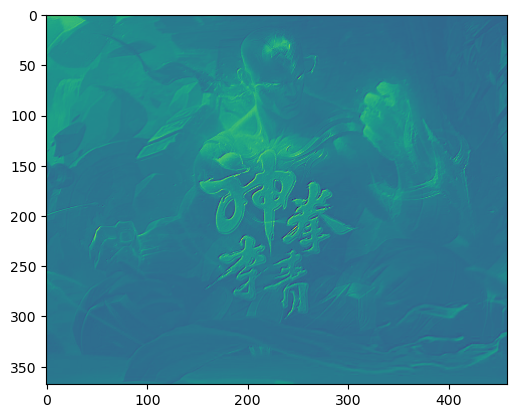

In [3]:
# 2. 测试
if __name__ == '__main__':
    dm01()